# Quiz 2, estadísticos y visualizaciones

Contexto: 'Floating Pandas, Inc.' es una empresa tecnológica innovadora que ofrece una plataforma de meditación y bienestar personalizada. El servicio se basa en una suscripción mensual de $10.80, proporcionando acceso a una variedad de meditaciones guiadas, ejercicios de mindfulness y herramientas de gestión del estrés adaptadas a las necesidades individuales de los usuarios. Esta tarifa permite a la empresa mantener una calidad alta en el contenido ofrecido y asegurar la actualización constante de su plataforma.

'Floating Pandas, Inc.' ha observado variaciones en la retención de clientes y busca identificar factores clave que podrían estar influyendo en este aspecto. La empresa está interesada en entender que es lo que esta afectando la relación a largo plazo con ellos así como esto impacta en el LTV esperado de sus clientes a 2 años.

Datos disponibles: .

Actividad 1):

- Objetivo: Identificar y visualizar factores que afectan la retención de clientes.
- Actividad: Utiliza gráficos para explorar la relación entre el NPS, los segmentos de clientes, y su Lifespan. Investiga si hay patrones o tendencias claras.
- Recomendación: Basándote en tus hallazgos, propone acciones específicas que 'Floating Pandas, Inc.' podría implementar para mejorar la retención y aumentar el LTV esperado de sus clientes.

Actividad 2):

Dada tu previa recomendación, ahora 'Floating Pandas, Inc.' está revisando su estrategia de asignación de recursos de marketing para maximizar el retorno sobre la inversión en diferentes segmentos de clientes.

- Objetivo: Analizar y comparar la efectividad del gasto en marketing en diferentes segmentos de clientes.
- Tarea: Calcula y visualiza cómo varía el CAC y el LTV a través del tiempo por segmento. Identifica cuáles segmentos ofrecen el mayor retorno sobre la inversión y cuáles podrían estar sub-optimizados.
- Recomendación: Formula estrategias de realineación de la inversión en marketing basadas en los datos analizados para optimizar los retornos futuros.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/customer_data.csv')
df.head()

,Customer_ID,Acquisition_Month,Segment,NPS_Score,Expected_Lifespan_Months,CAC,Technical_Issues,Expected_LTV_in_Two_Years
0,1,2022-01-31,Mid-Career,3,0,41.173062,2,0
1,2,2022-01-31,Young Professional,6,5,41.173062,1,54
2,3,2022-01-31,Mid-Career,5,22,41.173062,0,237
3,4,2022-01-31,Mid-Career,8,15,41.173062,2,162
4,5,2022-01-31,Young Professional,10,32,41.173062,0,259


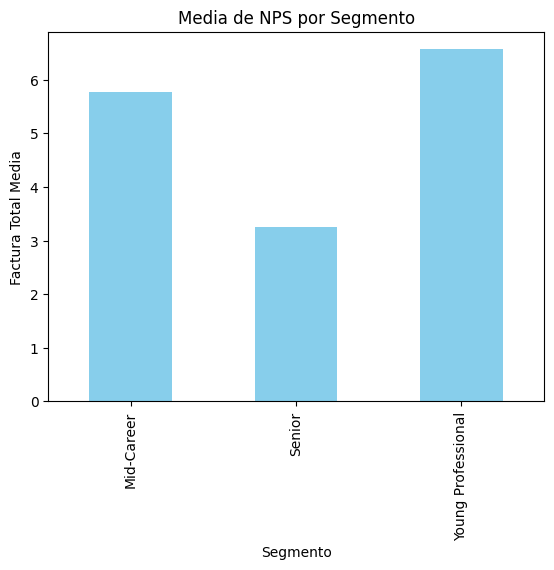

In [8]:
#Agrupamos los datos por día de la semana y calculamos la media de la factura total por día Creamos un gráfico de barras para visualizar la media de la factura total por día
df.groupby('Segment')['NPS_Score'].mean().plot(kind='bar', color='skyblue')

# Añadimos un título al gráfico
plt.title('Media de NPS por Segmento')

# Etiquetamos el eje X
plt.xlabel('Segmento')

# Etiquetamos el eje Y
plt.ylabel('Factura Total Media')

# Mostramos el gráfico
plt.show()

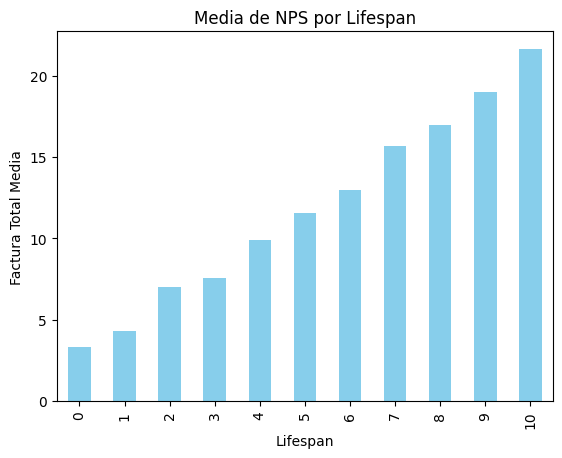

In [19]:
#Agrupamos los datos por día de la semana y calculamos la media de la factura total por día Creamos un gráfico de barras para visualizar la media de la factura total por día
df.groupby('NPS_Score')['Expected_Lifespan_Months'].mean().plot(kind='bar', color='skyblue')

# Añadimos un título al gráfico
plt.title('Media de NPS por Lifespan')

# Etiquetamos el eje X
plt.xlabel('Lifespan')

# Etiquetamos el eje Y
plt.ylabel('Factura Total Media')

# Mostramos el gráfico
plt.show()

<Axes: >

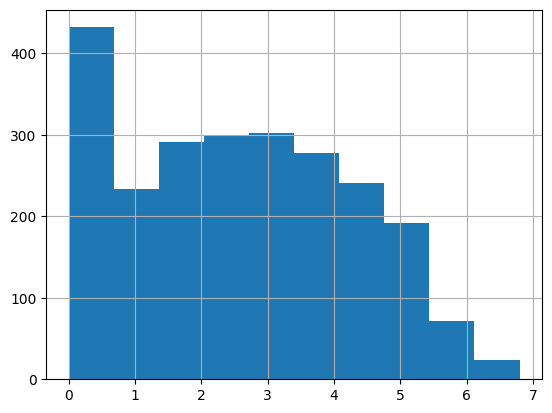

In [10]:
df['ltv_vs_cac'] = df['Expected_LTV_in_Two_Years'] / df['CAC']
df['ltv_vs_cac'].hist()

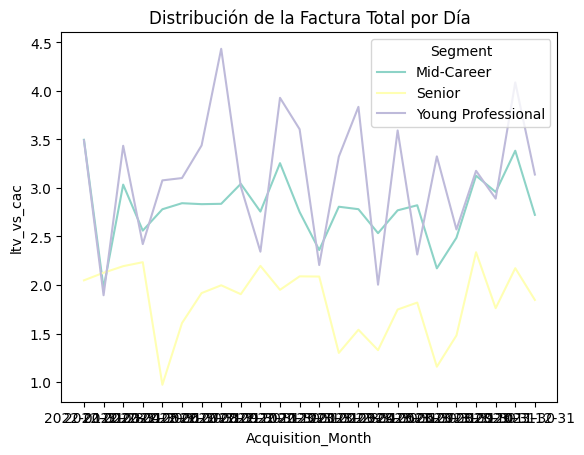

In [20]:
# Agrupamos los datos por día de la semana y sumamos las facturas totales por día
# Creamos un gráfico de líneas para visualizar la tendencia de la factura total a lo largo de la semana
df_grouped = df.groupby(['Segment', 'Acquisition_Month'])['ltv_vs_cac'].mean().reset_index()


# Creamos un gráfico de cajas para visualizar la distribución de la factura total por día de la semana
sns.lineplot(x='Acquisition_Month', y='ltv_vs_cac', data=df_grouped, hue='Segment', palette='Set3')

# Añadimos un título al gráfico
plt.title('Distribución de la Factura Total por Día')

# Mostramos el gráfico
plt.show()

In [11]:
df.groupby(['Segment', 'Acquisition_Month'])['ltv_vs_cac'].mean().reset_index()

,Segment,Acquisition_Month,ltv_vs_cac
0,Mid-Career,2022-01-31,3.495489
1,Mid-Career,2022-02-28,1.969052
2,Mid-Career,2022-03-31,3.033839
3,Mid-Career,2022-04-30,2.560273
4,Mid-Career,2022-05-31,2.780165
...,...,...,...
67,Young Professional,2023-08-31,2.572337
68,Young Professional,2023-09-30,3.175983
69,Young Professional,2023-10-31,2.890103
70,Young Professional,2023-11-30,4.086489
